# REDUCAO DA DIMENSIONALIDADE COM PCA

In [1]:
import pandas as pd
import numpy as np
dbase = pd.read_csv('../Dados/Bases_de_dados/census.csv')
dbase

,age,workclass,final-weight,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loos,hour-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [2]:
X = dbase.iloc[:, 0:14].values
y = dbase.iloc[:, 14].values

In [3]:
X

array([[39, ' State-gov', 77516, ..., 0, 40, ' United-States'],
       [50, ' Self-emp-not-inc', 83311, ..., 0, 13, ' United-States'],
       [38, ' Private', 215646, ..., 0, 40, ' United-States'],
       ...,
       [58, ' Private', 151910, ..., 0, 40, ' United-States'],
       [22, ' Private', 201490, ..., 0, 20, ' United-States'],
       [52, ' Self-emp-inc', 287927, ..., 0, 40, ' United-States']],
      dtype=object)

In [4]:
y

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [5]:
# CONVERSAO DE VALORES CATEGORICOS
from sklearn.preprocessing import LabelEncoder
conversor = LabelEncoder()

In [6]:
#CONVERTENDO AS COLUNAS CATEGORICAS
X[:, 1] = conversor.fit_transform(X[:, 1])
X[:, 3] = conversor.fit_transform(X[:, 3])
X[:, 5] = conversor.fit_transform(X[:, 5])
X[:, 6] = conversor.fit_transform(X[:, 6])
X[:, 7] = conversor.fit_transform(X[:, 7])
X[:, 8] = conversor.fit_transform(X[:, 8])
X[:, 9] = conversor.fit_transform(X[:, 9])
X[:, 13] = conversor.fit_transform(X[:, 13])

In [7]:
# Escalonamento dos valores
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Xs = scaler.fit_transform(X)
Xs

array([[ 0.03067056,  2.15057856, -1.06361075, ..., -0.21665953,
        -0.03542945,  0.29156857],
       [ 0.83710898,  1.46373585, -1.008707  , ..., -0.21665953,
        -2.22215312,  0.29156857],
       [-0.04264203,  0.09005041,  0.2450785 , ..., -0.21665953,
        -0.03542945,  0.29156857],
       ...,
       [ 1.42360965,  0.09005041, -0.35877741, ..., -0.21665953,
        -0.03542945,  0.29156857],
       [-1.21564337,  0.09005041,  0.11095988, ..., -0.21665953,
        -1.65522476,  0.29156857],
       [ 0.98373415,  0.77689313,  0.92989258, ..., -0.21665953,
        -0.03542945,  0.29156857]])

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
X_train.shape, X_test.shape

((22792, 14), (9769, 14))

In [9]:
y_train.shape, y_test.shape

((22792,), (9769,))

# APLICACAO DO PCA - NAO SUPERVISIONADO

In [10]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 8) # DEFINICAO DO NUMERO DE ATRIBUTOS A MANTER APOS A REDUCAO

In [11]:
# TREINAMENTO OU EXTRACAO DAS CARATERISTICAS
Xpca_treino = pca.fit_transform(X_train)
Xpca_teste = pca.transform(X_test)

In [12]:
Xpca_treino.shape

(22792, 8)

In [13]:
# VISUALIZACAO DAS VARIANCIAS 
pca.explained_variance_ratio_

array([9.94922911e-01, 5.06227345e-03, 1.47760159e-05, 1.66058845e-08,
       1.32377605e-08, 5.53127321e-09, 1.61049477e-09, 1.42701258e-09])

In [14]:
# VISUALIZACAO DA PERCENTAGEM DOS ATRIBUTOS APLICADOS
pca.explained_variance_ratio_.sum()

0.9999999989132574

In [15]:
# TESTE COM RANDOM_FOREST
from sklearn.ensemble import RandomForestClassifier
Rf_pca = RandomForestClassifier()
Rfpca = Rf_pca.fit(Xpca_treino, y_train)
Rfpca.score(Xpca_teste, y_test)

0.8261848705087522

In [16]:
prevendo = Rfpca.predict(Xpca_teste)
prevendo

array([' <=50K', ' <=50K', ' <=50K', ..., ' >50K', ' <=50K', ' <=50K'],
      dtype=object)

In [17]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prevendo))

              precision    recall  f1-score   support

       <=50K       0.85      0.94      0.89      7407
        >50K       0.72      0.46      0.56      2362

    accuracy                           0.83      9769
   macro avg       0.78      0.70      0.73      9769
weighted avg       0.82      0.83      0.81      9769



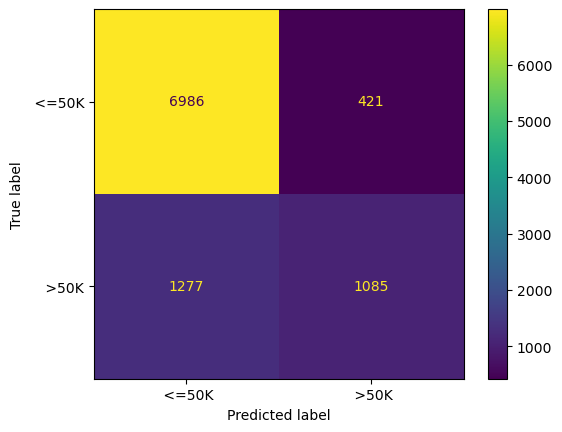

In [18]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
cm = ConfusionMatrixDisplay.from_predictions(y_test, prevendo)
plt.show()

# Kernel PCA - METODO NAO SUPERVISIONADA - Nao necessita de classe y

In [19]:
from sklearn.decomposition import KernelPCA
Kpca = KernelPCA(n_components = 8, kernel='rbf')
X_kpca_train = Kpca.fit_transform(X_train)
X_kpca_test = Kpca.transform(X_test)

In [20]:
X_kpca_train.shape, X_kpca_test.shape

((22792, 8), (9769, 8))

In [21]:
X_kpca_train

array([[-1.20274164e-04, -1.02286116e-04, -1.94720913e-09, ...,
         7.14497464e-17,  6.83465540e-17,  1.70636391e-16],
       [-1.20274164e-04, -1.02286116e-04, -1.94720913e-09, ...,
         7.09195241e-17,  6.79057322e-17,  1.71403038e-16],
       [-1.20274184e-04, -1.02286141e-04, -1.94720965e-09, ...,
         7.10965035e-17,  6.89790376e-17,  1.70253068e-16],
       ...,
       [-1.20274164e-04, -1.02286116e-04, -1.94720913e-09, ...,
         7.08722588e-17,  6.85382157e-17,  1.71230542e-16],
       [-1.20274164e-04, -1.02286116e-04, -1.94720913e-09, ...,
         7.09013620e-17,  6.84998834e-17,  1.71230542e-16],
       [-1.20274164e-04, -1.02286116e-04, -1.94720913e-09, ...,
         7.08997072e-17,  6.85190496e-17,  1.71115545e-16]])

In [24]:
# TESTE COM RANDOMFOREST
from sklearn.ensemble import RandomForestClassifier
Rf_KernelPCA = RandomForestClassifier()
Kernel_PCA = Rf_KernelPCA.fit(X_kpca_train, y_train)
Kernel_PCA.score(X_kpca_test, y_test)

0.7581123963558194

In [25]:
previsor = Kernel_PCA.predict(X_kpca_test)
previsor 

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [30]:
from sklearn.metrics import accuracy_score, classification_report
print(classification_report(y_test, previsor))
accuracy_score(y_test, previsor)

              precision    recall  f1-score   support

       <=50K       0.76      1.00      0.86      7407
        >50K       0.00      0.00      0.00      2362

    accuracy                           0.76      9769
   macro avg       0.38      0.50      0.43      9769
weighted avg       0.57      0.76      0.65      9769



0.7581123963558194

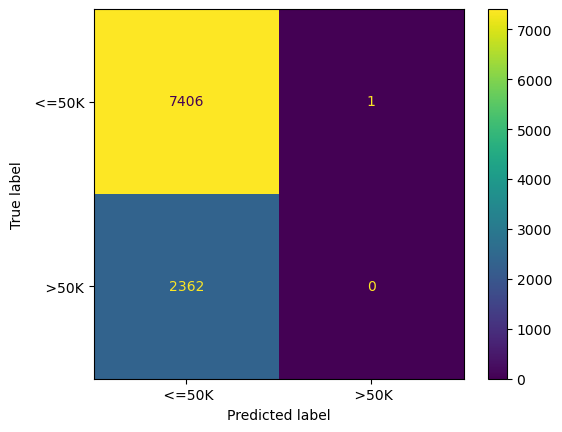

In [31]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = ConfusionMatrixDisplay.from_predictions(y_test, previsor)
plt.show()

# EXTRA_TREE - SUPERVISIONADO - classe necessario no train

In [46]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()
X_lda_train = lda.fit_transform(X_train, y_train)
X_lda_test = lda.transform(X_test)

In [47]:
X_lda_train.shape, X_lda_test.shape

((22792, 1), (9769, 1))

In [48]:
X_lda_train

array([[ 0.85498524],
       [-0.54953126],
       [ 0.68839176],
       ...,
       [-1.3711623 ],
       [ 2.43964133],
       [-0.18933703]])

In [51]:
from sklearn.ensemble import RandomForestClassifier
Rflda = RandomForestClassifier()
lda = Rflad.fit(X_lda_train, y_train)
lda.score(X_lda_test, y_test)

0.7418364213327874

In [52]:
predlda = lad.predict(X_lda_test)
predlda

array([' <=50K', ' <=50K', ' <=50K', ..., ' >50K', ' <=50K', ' <=50K'],
      dtype=object)

In [55]:
from sklearn.metrics import accuracy_score, classification_report
print(classification_report(y_test, predlda))
accuracy_score(y_test, predlda)

              precision    recall  f1-score   support

       <=50K       0.83      0.83      0.83      7407
        >50K       0.47      0.47      0.47      2362

    accuracy                           0.74      9769
   macro avg       0.65      0.65      0.65      9769
weighted avg       0.74      0.74      0.74      9769



0.7418364213327874

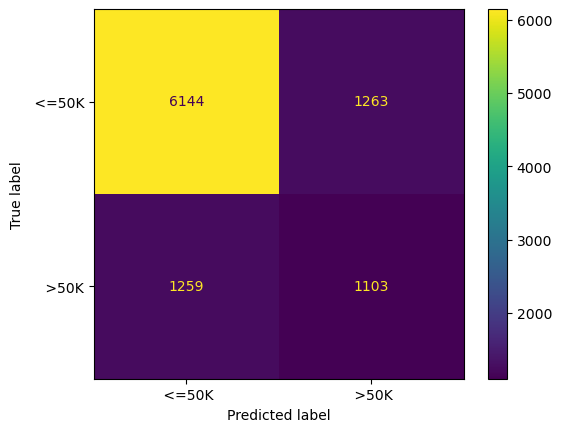

In [56]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = ConfusionMatrixDisplay.from_predictions(y_test, predlda)
plt.show()